# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_point, geom_line, theme_minimal, labs

In [30]:
penguins = sns.load_dataset("penguins")

df = penguins.dropna()
df = pd.get_dummies(df, columns=["species", "island", "sex"], drop_first=True)

y = df["bill_depth_mm"]

all_features = (["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Chinstrap", "species_Gentoo", "island_Dream", "island_Torgersen", "sex_Male"])

X_all = df[all_features].dropna()
y_all = y.loc[X_all.index]

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.25
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [31]:
# Model 1 - Bill Depth vs. Bill Length
Xtr1 = X_train[["bill_length_mm"]]
Xte1 = X_test[["bill_length_mm"]]
m1 = LinearRegression().fit(Xtr1, y_train)

rmse_tr_1 = np.sqrt(mean_squared_error(y_train, m1.predict(Xtr1)))
rmse_te_1 = np.sqrt(mean_squared_error(y_test,  m1.predict(Xte1)))

print(rmse_tr_1)
print(rmse_te_1)

1.9510744439296437
1.8027051744421245


In [32]:
# Model 2 - Bill Depth vs. Bill Length, Flipper Length and Body Mass
Xtr2 = X_train[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]
Xte2 = X_test[["bill_length_mm", "flipper_length_mm", "body_mass_g"]]
m2 = LinearRegression().fit(Xtr2, y_train)

rmse_tr_2 = np.sqrt(mean_squared_error(y_train, m2.predict(Xtr2)))
rmse_te_2 = np.sqrt(mean_squared_error(y_test,  m2.predict(Xte2)))

print(rmse_tr_2)
print(rmse_te_2)

1.5304835808322304
1.640065077268111


In [33]:
# Model 3 - Bill Depth vs. Bill Length, Flipper Length, Body Mass and Species
Xtr3 = X_train[["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Chinstrap", "species_Gentoo"]]
Xte3 = X_test[["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Chinstrap", "species_Gentoo"]]
m3 = LinearRegression().fit(Xtr3, y_train)

rmse_tr_3 = np.sqrt(mean_squared_error(y_train, m3.predict(Xtr3)))
rmse_te_3 = np.sqrt(mean_squared_error(y_test,  m3.predict(Xte3)))

print(rmse_tr_3)
print(rmse_te_3)

0.8126584385563721
0.8961325656295764


In [34]:
# Model 4 - Bill Depth vs. Bill Length, Flipper Length, Body Mass, Species, Island, and Sex
Xtr4 = X_train[["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Chinstrap", "species_Gentoo", "island_Dream", "island_Torgersen", "sex_Male"]]
Xte4 = X_test[["bill_length_mm", "flipper_length_mm", "body_mass_g", "species_Chinstrap", "species_Gentoo", "island_Dream", "island_Torgersen", "sex_Male"]]
m4 = LinearRegression().fit(Xtr4, y_train)

rmse_tr_4 = np.sqrt(mean_squared_error(y_train, m4.predict(Xtr4)))
rmse_te_4 = np.sqrt(mean_squared_error(y_test,  m4.predict(Xte4)))

print(rmse_tr_4)
print(rmse_te_4)

0.7759803260291644
0.8154074244478576


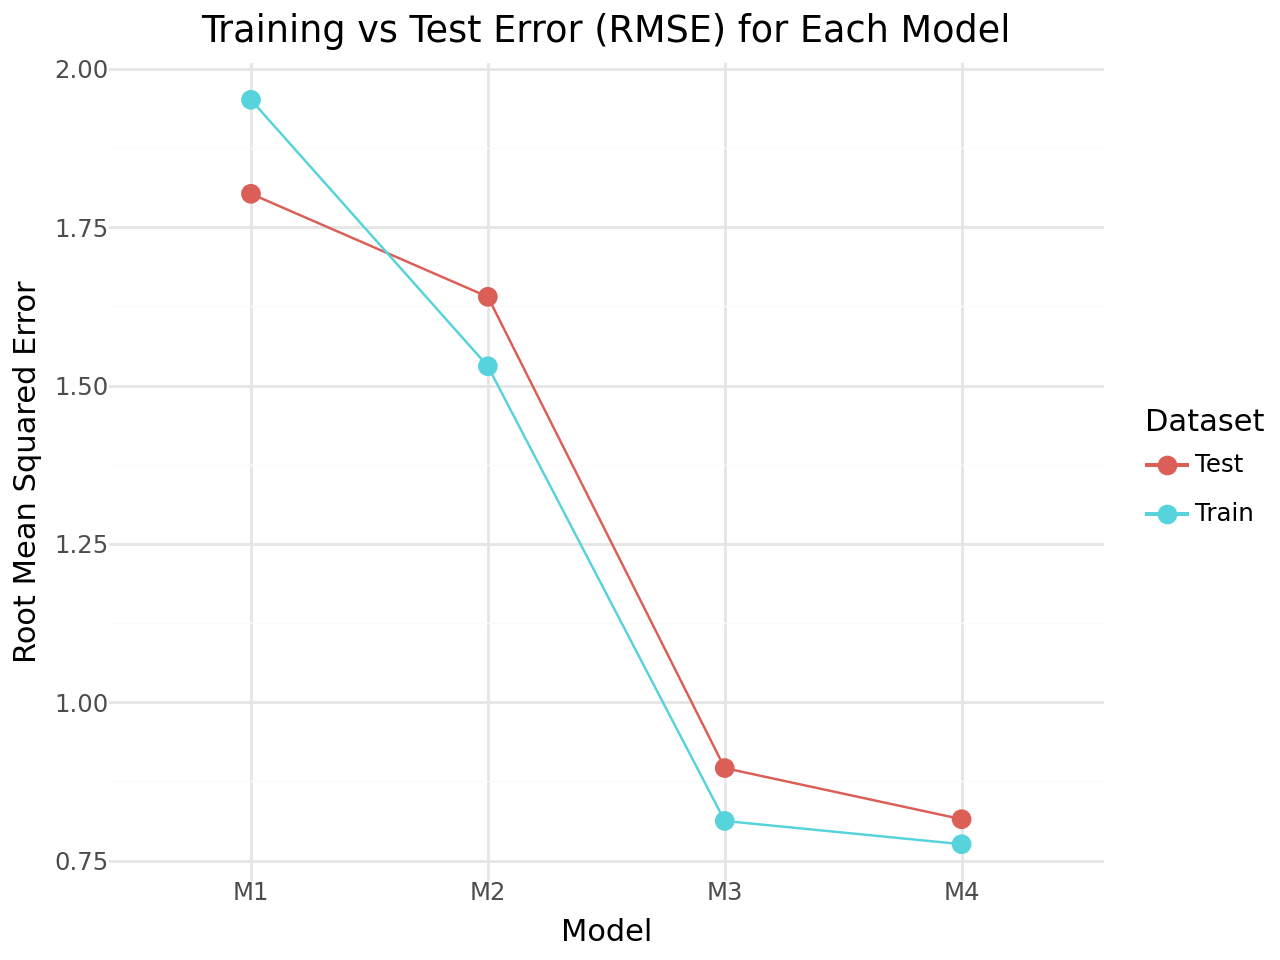

In [35]:
# Re-creating the plot from figure 1
results = pd.DataFrame({
    "Model": ["M1","M1","M2","M2","M3","M3","M4","M4"],
    "Dataset": ["Train","Test"]*4,
    "RMSE": [rmse_tr_1, rmse_te_1,
             rmse_tr_2, rmse_te_2,
             rmse_tr_3, rmse_te_3,
             rmse_tr_4, rmse_te_4]
})

(
    ggplot(results, aes(x="Model", y="RMSE", color="Dataset", group="Dataset"))
    + geom_point(size=3)
    + geom_line()
    + theme_minimal()
    + labs(
        title="Training vs Test Error (RMSE) for Each Model",
        x="Model",
        y="Root Mean Squared Error"
    )
)

Model 4 was the best of the four because it has the lowest root mean square error for both the training and test data.